# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [30]:
sinasc = pd.read_csv('SINASC_RO_2019.CSV')
sinasc.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [5]:
def categoriza_apgar(apgar):
    if 0 <= apgar <= 3:
        return 'Asfixia grave'
    if 4 <= apgar <= 5:
        return 'Asfixia moderada'
    if 6 <= apgar <= 7:
        return 'Asfixia leve'
    if 8 <= apgar <= 10:
        return 'Normal'
    else:
        return 'Valor inválido'

sinasc['APGAR5_CAT'] = sinasc['APGAR5'].apply(categoriza_apgar)
print(sinasc['APGAR5_CAT'].value_counts())

APGAR5_CAT
Normal              26463
Asfixia leve          320
Valor inválido        103
Asfixia grave          74
Asfixia moderada       68
Name: count, dtype: int64


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

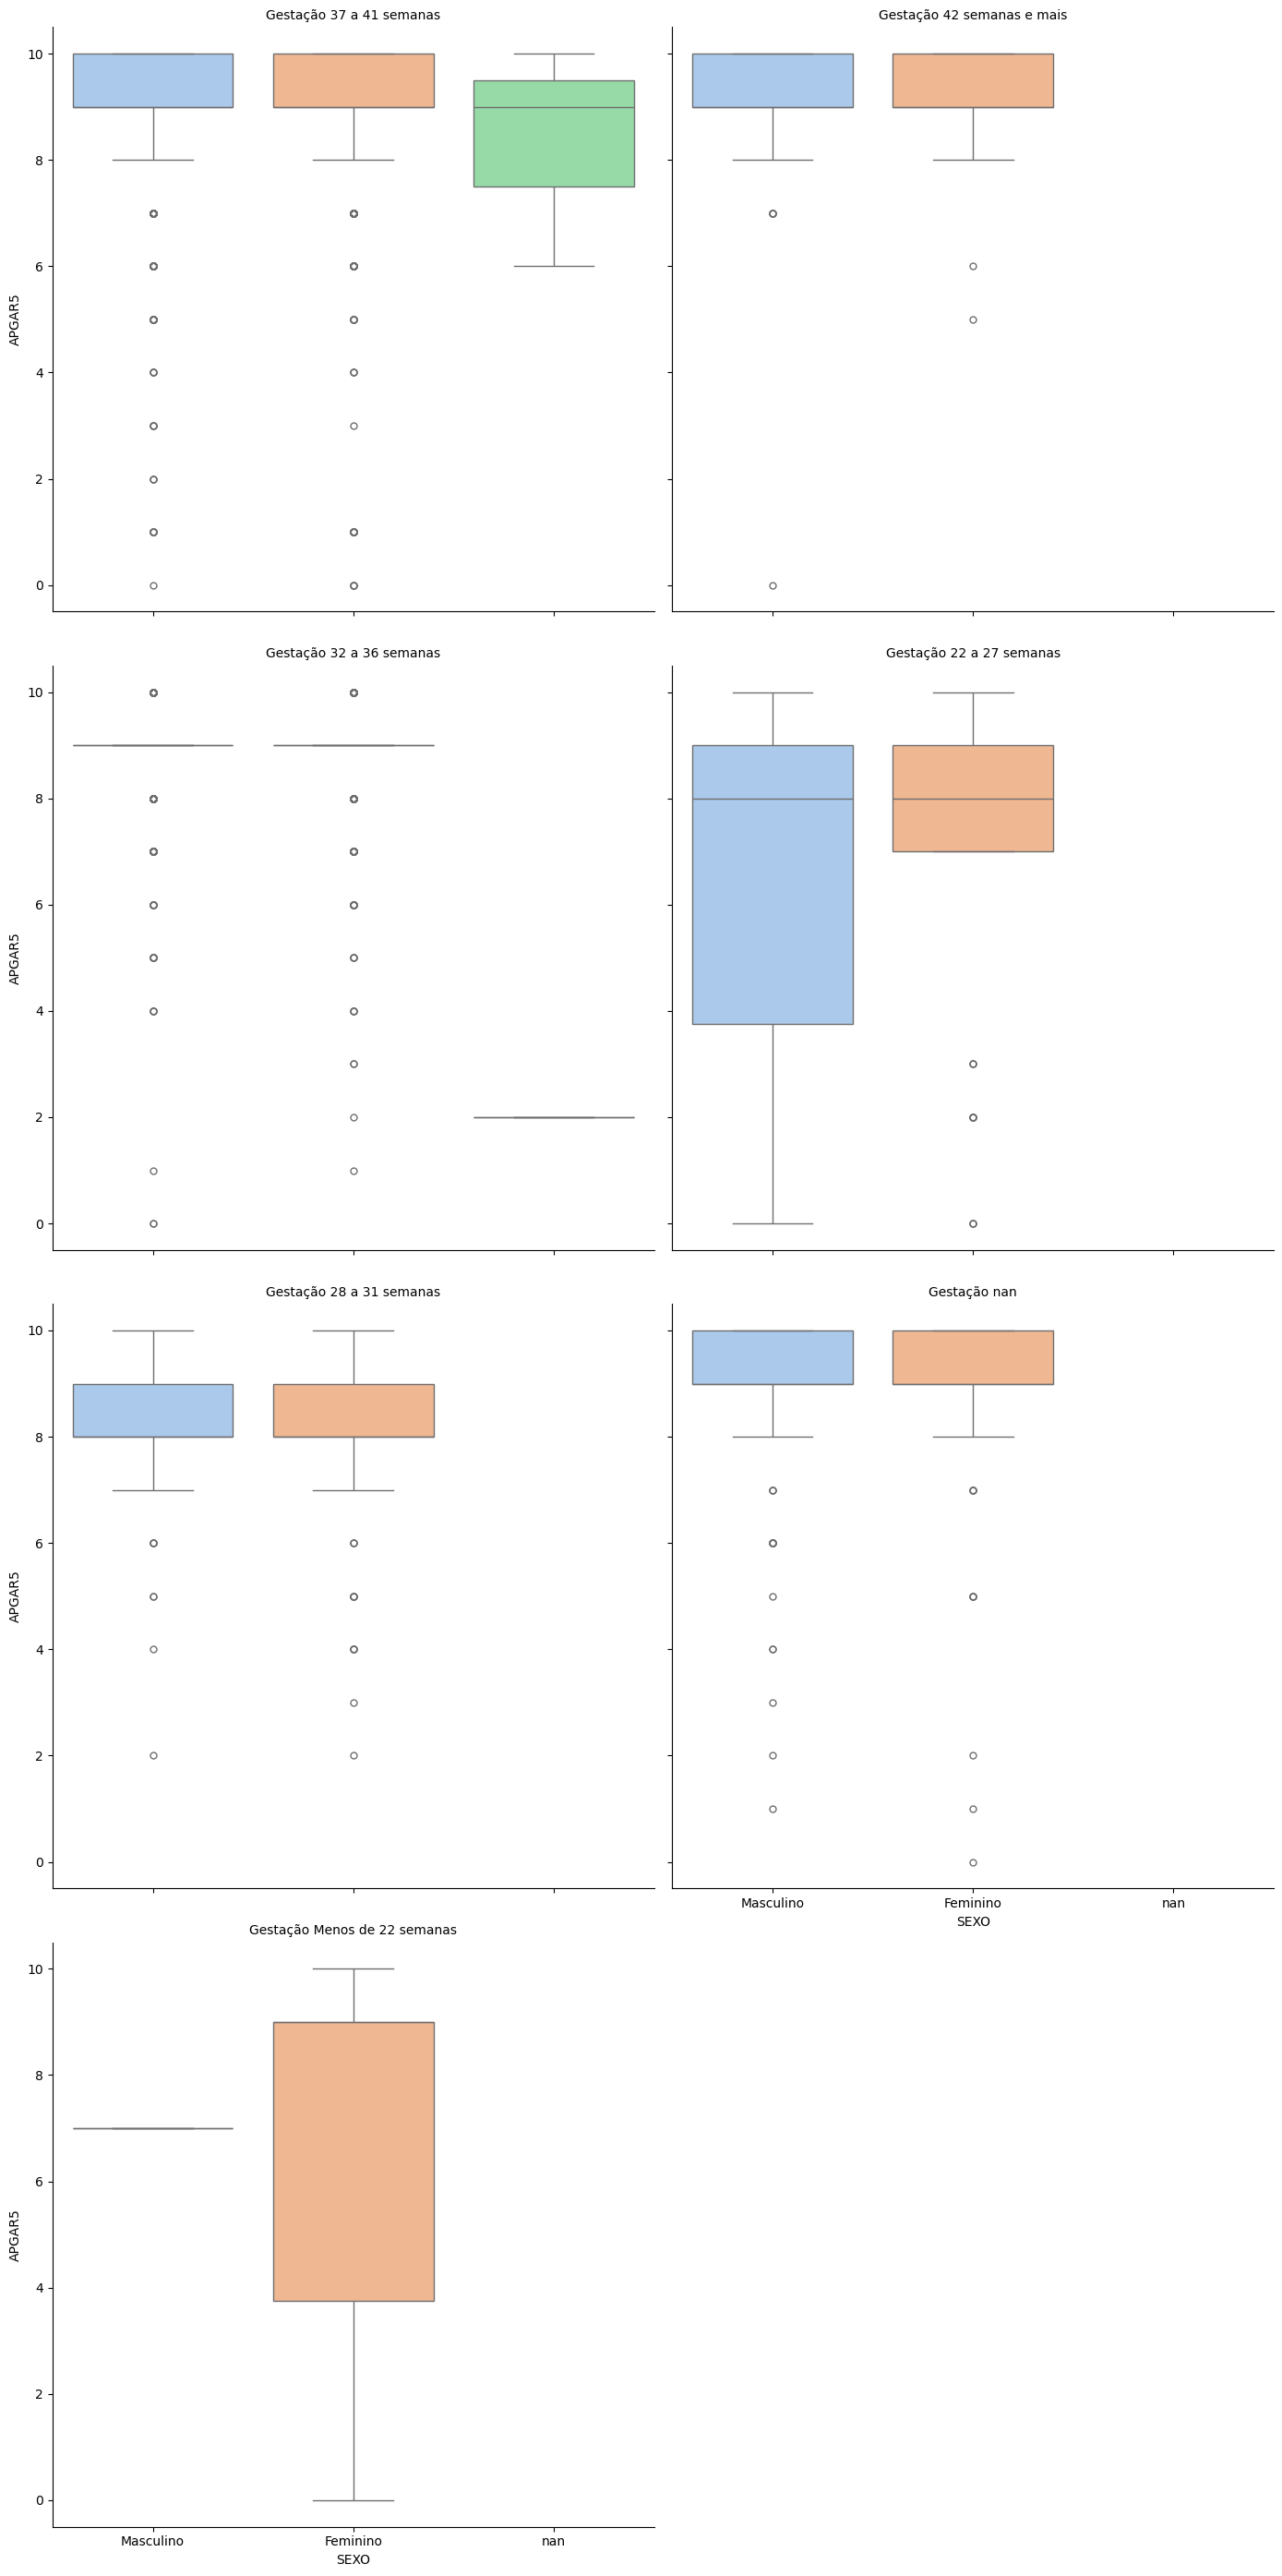

In [17]:
sinasc['SEXO'] = sinasc['SEXO'].astype(str)
sinasc['GESTACAO'] = sinasc['GESTACAO'].astype(str)

g = sns.catplot(data = sinasc,
               x = 'SEXO',
               y = 'APGAR5',
               col = 'GESTACAO',
               kind = 'box',
               hue = 'SEXO',
               col_wrap = 2,
               height = 7, 
               palette = 'pastel',
               legend = False
               )
g.set_titles('Gestação {col_name}')
plt.tight_layout()
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [31]:
sinasc['GESTACAO'] = sinasc['GESTACAO'].astype(str)
sinasc['APGAR5'] = sinasc['APGAR5'].astype(str)

tabela_cruzada = pd.crosstab(sinasc['GESTACAO'],sinasc['APGAR5'])
print(tabela_cruzada)

APGAR5               0.0  1.0  10.0  2.0  3.0  4.0  5.0  6.0  7.0   8.0  \
GESTACAO                                                                  
22 a 27 semanas        7    0     8    8    6    1    0    2   10    24   
28 a 31 semanas        0    0    13    2    1    5    7    7   11    61   
32 a 36 semanas        2    2   465    2    2    8   11   17   56   362   
37 a 41 semanas        5   20  7284    3    5    7   21   45  151  1417   
42 semanas e mais      1    0   223    0    0    0    1    1    5    44   
Menos de 22 semanas    1    0     1    1    0    0    0    0    1     0   
nan                    1    2   399    2    1    2    5    7    7    86   

APGAR5                 9.0  nan  
GESTACAO                         
22 a 27 semanas         19    1  
28 a 31 semanas         55    3  
32 a 36 semanas       1307   15  
37 a 41 semanas      13565   66  
42 semanas e mais      423    2  
Menos de 22 semanas      3    0  
nan                    704   16  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [35]:
tabela_pct = tabela_cruzada.div(tabela_cruzada.sum(axis = 1), axis = 0) * 100
tabela_pct = tabela_pct.round(2)
print(tabela_pct)

APGAR5                 0.0   1.0   10.0    2.0   3.0   4.0   5.0   6.0    7.0  \
GESTACAO                                                                        
22 a 27 semanas       8.14  0.00   9.30   9.30  6.98  1.16  0.00  2.33  11.63   
28 a 31 semanas       0.00  0.00   7.88   1.21  0.61  3.03  4.24  4.24   6.67   
32 a 36 semanas       0.09  0.09  20.68   0.09  0.09  0.36  0.49  0.76   2.49   
37 a 41 semanas       0.02  0.09  32.25   0.01  0.02  0.03  0.09  0.20   0.67   
42 semanas e mais     0.14  0.00  31.86   0.00  0.00  0.00  0.14  0.14   0.71   
Menos de 22 semanas  14.29  0.00  14.29  14.29  0.00  0.00  0.00  0.00  14.29   
nan                   0.08  0.16  32.39   0.16  0.08  0.16  0.41  0.57   0.57   

APGAR5                 8.0    9.0   nan  
GESTACAO                                 
22 a 27 semanas      27.91  22.09  1.16  
28 a 31 semanas      36.97  33.33  1.82  
32 a 36 semanas      16.10  58.11  0.67  
37 a 41 semanas       6.27  60.05  0.29  
42 semanas e mais 

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

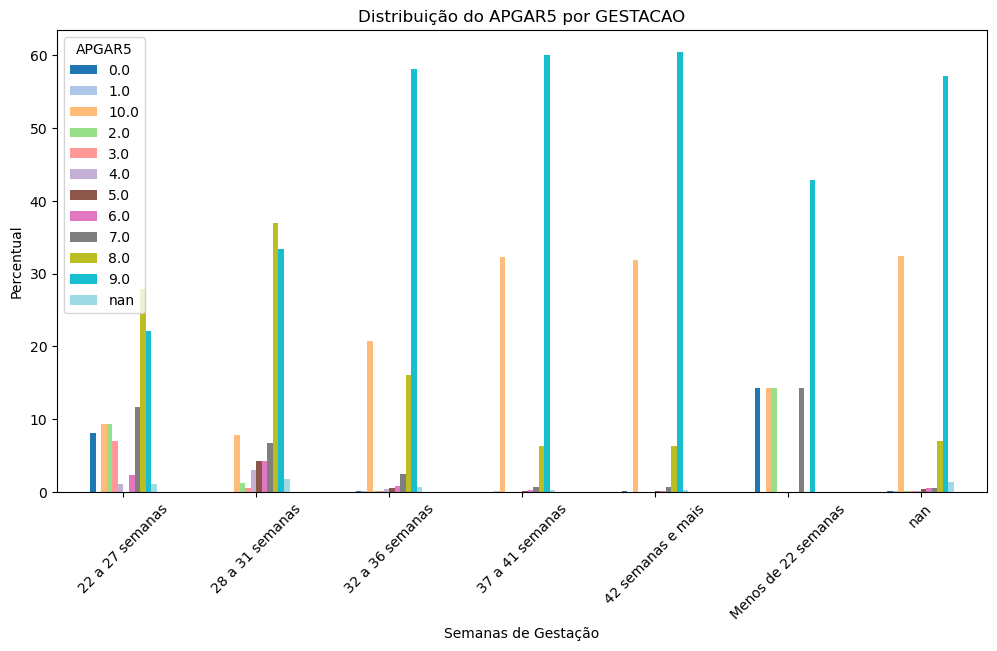

In [98]:
tabela_pct.plot(kind='bar', figsize=(12, 6), cmap='tab20')

plt.xlabel('Semanas de Gestação')
plt.ylabel('Percentual')
plt.title('Distribuição do APGAR5 por GESTACAO')
plt.legend(title='APGAR5')
plt.xticks(rotation=45)
plt.show()

#### O conjunto de dados corrobora a afirmação dos médicos: bebês prematuros apresentam maior risco de baixa vitalidade ao nascer (baixas notas de APGAR5).

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

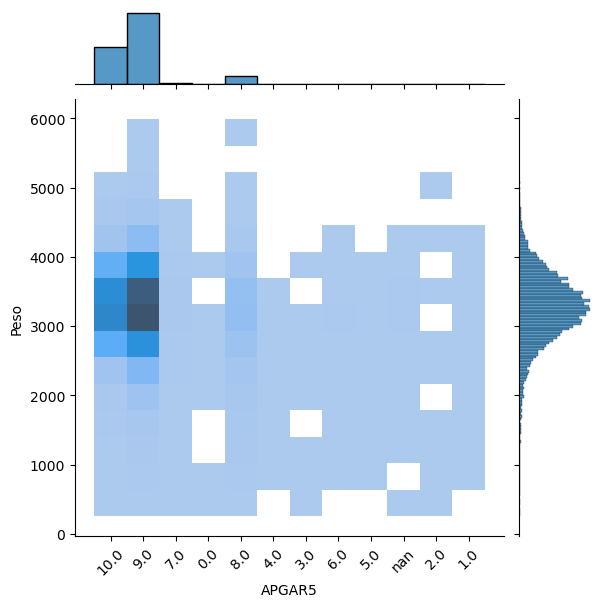

In [97]:
sns.jointplot(data = sinasc, x = 'APGAR5', y = 'PESO', kind = 'hist', bins = [15, 15])

plt.xlabel('APGAR5')
plt.ylabel('Peso')
plt.xticks(rotation=45)
plt.show()

##### Podemos observar que numa faixa entre 2,5Kg até 4,5Kg, a incidência de APGAR5 com notas 9.0 e 10.0 é maior do que em outras faixas de peso. Então podemos afirmar que as duas variáveis tem relação.